### KNN-鸢尾花分类2

In [2]:
import numpy as np
import matplotlib.pylab as pyb
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [4]:
X,Y = datasets.load_iris(True)
# 4个属性 ，4 维空间 4维数据
# 150 代表样本数量   
X.shape

(150, 4)

In [6]:
# 进行降维处理  切片处理  最好是使用算法降维
X = X[:,:2] # 使用前两个数据
X.shape
# 测试数据

(150, 2)

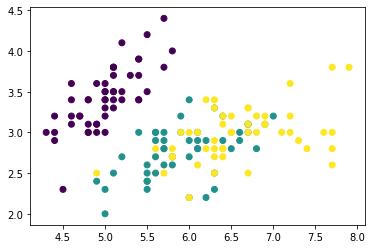

In [99]:
# 画图
pyb.scatter(X[:,0],X[:,1],c=Y)

### 训练数据

In [14]:
#训练
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
# 获取测试数据
# 横坐标宽度4 ----- 8  纵坐标 2 ---- 4.5
# 背景点，取出来 调用meshgrid
x1 = np.linspace(4,8,100)
y1 = np.linspace(2,4.5,80)
X1,Y1 = np.meshgrid(x1,y1)
# display(X1.shape,Y1.shape)

# X1 = X1.reshape(-1,1)
# Y1 = Y1.reshape(-1,1)
# X_test = np.concatenate([X1,X2],axis =1)
# ravel 将多维展平
X_test = np.c_[X1.ravel(),Y1.ravel()]
X_test.shape
# X1.shape

(8000, 2)

### 预测

In [100]:
%%time
y_ = knn.predict(X_test)
y_.shape

Wall time: 180 ms


(8000,)

###  绘图

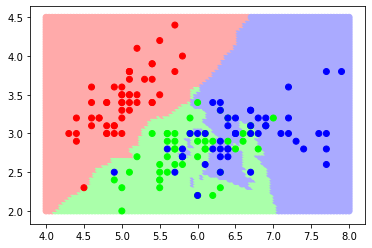

In [93]:
# 画图
from matplotlib.colors import ListedColormap
# 定义绘图MAP 颜色
lc = ListedColormap(colors=['#FFAAAA','#AAFFAA','#AAAAFF'])
lc2 = ListedColormap(['#FF0000','#00FF00','#0000FF'])
# draw base map
pyb.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=lc)
# draw fit data map
pyb.scatter(X[0:,0],X[:,1],c=Y,cmap=lc2)

In [94]:
y_.reshape(80,100)
y_.shape

X1.shape
Y1.shape

(80, 100)

Wall time: 23.5 ms


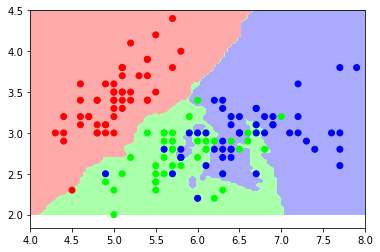

In [98]:
%%time
# use other to draw
pyb.contourf(X1,Y1,y_.reshape(80,100),cmap = lc)
pyb.scatter(X[0:,0],X[:,1],c=Y,cmap=lc2)